In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned CSV file
file_path = "cleaned_BG_prediction.csv"
df = pd.read_csv(file_path)

# Set Seaborn style
sns.set(style="whitegrid")

df['Public Dataset? If Y, which one(s)?']

# get the ones which are yes

df['PD_YN'] = df['Public Dataset? If Y, which one(s)?'].apply(lambda x: 'Y' if ("Yes" in str(x) or "Y" in str(x)) and "No" not in str(x) else 'N')

import re
import re

def extract_datasets(dataset_str):
    """
    Extracts dataset names from a given string and returns them as a list.
    Handles variations in formatting by splitting on commas, semicolons, new lines, and 'and'.
    """
    if not isinstance(dataset_str, str) or dataset_str.strip().lower() in ["no", "n", "none"]:
        return []

    # Replace common separators with a comma for uniform splitting
    dataset_str = re.sub(r'\s*(?:,|;| and |\n)\s*', ',', dataset_str)

    # Split into list and remove extra spaces
    datasets = [ds.strip() for ds in dataset_str.split(',') if ds.strip()]
    
    return datasets

import re

# Dictionary to map variations to standardized names
dataset_mapping = {
    "OhioT1DM": "Ohio-T1DM",
    "Ohio T1DM": "Ohio-T1DM",
    "Ohio-T1DM": "Ohio-T1DM",
    "UVA/Padova": "UVA-Padova",
    "ShanghaiT1DM": "Shanghai-T1DM",
    "DirecNet": "DirecNet",
    "No: Clinical Dataset": "Clinical Dataset",
    "Clinical dataset": "Clinical Dataset",
    "Clinical Dataset": "Clinical Dataset",
}

def extract_and_standardize_datasets(dataset_str):
    """
    Extracts dataset names from a given string, removes misleading prefixes, 
    and standardizes dataset names to ensure consistency.
    """
    if not isinstance(dataset_str, str) or dataset_str.strip().lower() in ["no", "n", "none"]:
        return []

    # Replace common separators with a comma for uniform splitting
    dataset_str = re.sub(r'\s*(?:,|;|:| and |\n)\s*', ',', dataset_str)

    # Split into list and clean each entry
    datasets = [ds.strip() for ds in dataset_str.split(',') if ds.strip()]

    # Standardize names based on the mapping
    standardized_datasets = [dataset_mapping.get(ds, ds) for ds in datasets]

    return list(set(standardized_datasets))  # Remove duplicates

# Apply to dataset column
df['Standardized Datasets'] = df['Public Dataset? If Y, which one(s)?'].apply(extract_and_standardize_datasets)

datasets = df['Standardized Datasets'].explode().value_counts()

dataset_df = datasets.reset_index()
dataset_df.columns = ['Dataset', 'Count']
dataset_df

,Dataset,Count
0,Yes,34
1,Ohio-T1DM,23
2,No,10
3,Y,4
4,DirecNet,3
5,Clinical Dataset,3
6,ABC4D,2
7,From UVA/PADOVA simulator,2
8,No (data collected in Soonchunhyang University...,2
9,Open,2


In [3]:
df

,Link,Code Available?,"Public Dataset? If Y, which one(s)?",Multiple Datasets?,Dataset Distribution included?,Sample size for Evaluation,Hyperparameters Reported?,Method for tuning hyperparameters reported?,"Evaluation metric reported (RMSE / MAPE, MAE)","Include all reported prediction horizon (like, future 30, future 60 ...)",Sampling horizon,"Reported metrics (RMSE, or MAPE, or ..)",Baseline included?,Variance Reported?,other lifestyle factors applied to train model,PD_YN,Standardized Datasets
0,https://ieeexplore.ieee.org/abstract/document/...,No,"Y, Ohio-T1DM",No,No,"For each sample, training (~ 40 days) and test...",Yes,"Y, grid search","RMSE, MAE, gRMSE","30, 60 min","30, 60 min","RMSE, MAE, gRMSE","Yes, RF, SVR, ANN",No,NaN,Y,"[Ohio-T1DM, Y]"
1,https://www.sciencedirect.com/science/article/...,No,"Y, DirecNet",No,"Y, mean / min / max / std BG for each individu...",each patient’s dataset is split into two parts...,Yes,"Y, grid search","RMSE, MAE, gMSE, R^2","15, 30, 45, 60 min",30 min,"RMSE, MAE, gMSE, R^2","Yes, RF, SVR, DT, KNN, AdaBoost, XGBoost",Yes,NaN,Y,"[DirecNet, Y]"
2,https://doi.org/10.1016/j.neunet.2025.107229,Yes,"Y, 3 public (Ohio-T1DM, Shanghai-T1DM, Shangha...",Yes,"Y, summary table for mean / std of BG, TIR TBR...",OhioT1DM: 12 participants (Type 1 Diabetes)\nA...,Yes,"Y, grid search","RMSE, MAE, MAPE, gRMSE",30-min,48 x 5 mins,"RMSE, MAE, MAPE, gRMSE","Yes, 15 baselines",Yes,"For Ohio: bolus, basal, meal, finger stick, ex...",Y,"[ShanghaiT2DM), 3 public (Ohio-T1DM, Y, 1 not ..."
3,https://ieeexplore.ieee.org/abstract/document/...,"Yes? (had the link, but it is invalid)","Y, Ohio-T1DM","Y, OhioT1DM and 2 synthetic datasets (AIDA and...",No,OhioT1DM: 6 participants\nAIDA simulator: 600 ...,Yes,"Y, grid search","RMSE, CEGA","30, 60 min","aida: 12 hr\nuva/padova, ohiot1dm: 6 hr","RMSE, MAE, CEGA",Yes. t0 baseline (Assumes no change in blood ...,Yes,"Insulin Data (I), Meal Information (M), Time o...",Y,"[Ohio-T1DM, Y]"
4,https://ieeexplore.ieee.org/document/8779644,No,"Yes. UVA-Padova Simulator, ABCD4, Ohio-T1DM","Yes, 1 Synthetic,(UVA/Padova), 2 clinical ABCD...",No*\nStandard deviation of meal times is given...,"10 Simulated Adults, 10 Simulated Adolescents,...",No,Yes,"RMSE, MARD, Time Lag","30, 60",16 x 5min,"RMSE, MARD, Time Lag",No,Yes,NaN,Y,"[Yes. UVA-Padova Simulator, Ohio-T1DM, ABCD4]"
5,http://dmsjournal.biomedcentral.com/articles/1...,NA/ Review Paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,[]
6,https://ieeexplore.ieee.org/abstract/document/...,No,"Y. Ohio-T1DM, ARISES, ABC4D","Yes, OhioT1DM for evaluation",Yes (Train/Test split),"Yes. 12 (Ohio), 12 (ARISES), 25 (ABC4D)",Yes,Yes,"Yes, RMSE, MAE, gRMSE, error score","30, 60",no,"Yes, RMSE, MAE, gRMSE, error score",Yes. Transformer Model,Yes,NaN,Y,"[ARISES, ABC4D, Y. Ohio-T1DM]"
7,https://journals.plos.org/plosone/article?id=1...,Yes,N. Simulated from UVA-Padova,No,No,100,No,No,"RMSE, gRMSE, MAD, gMAD, MARD, gMARD",120,6 hr,"RMSE, gRMSE, MAD, gMAD, MARD, gMARD",Yes,Yes,NaN,N,[N. Simulated from UVA-Padova]
8,https://ieeexplore.ieee.org/abstract/document/...,No,"Yes, Ohio-T1DM, ShanghaiDM","Yes, OhioT1DM, ShanghaiDM",No,12 for OhioT1DM model\n100 from ShanghaiT1DM (...,No,Yes (HyperBand Tuner),NaN,"30, 60",120,"RMSE, MAPE, gRMSE, MAE","Yes,",Yes,NaN,Y,"[ShanghaiDM, Ohio-T1DM, Yes]"
9,https://ceur-ws.org/Vol-2148/paper14.pdf,No,"Yes, Ohio-T1DM (2018)",NaN,Yes \nRules for selection of subset based on C...,6 for OhioT1DM (2018),Yes,Yes (Kfold),RMSE,"30, 60",30,"RMSE, Sensitivity, Specificity, Accuracy",No,No*\nAverage and individual data points reported,NaN,Y,"[Ohio-T1DM (2018), Yes]"


In [4]:
dataset_mapping = {
    "Yes": "Yes",
    "Y": "Yes",
    "Y. Ohio-T1DM": "Ohio-T1DM",
    "Yes: Ohio-T1DM": "Ohio-T1DM",
    "Open: Ohio-T1DM": "Ohio-T1DM",
    "Ohio-T1DM (2018)": "Ohio-T1DM",
    "OhioT1DM": "Ohio-T1DM",
    "Ohio T1DM": "Ohio-T1DM",
    "Ohio-T1DM.": "Ohio-T1DM",
    "OhioT1DM.": "Ohio-T1DM",
    "OhiotT1DM": "Ohio-T1DM",
    "Open: OhiotT1DM": "Ohio-T1DM",
    "3 public (Ohio-T1DM": "Ohio-T1DM",
    
    "DirecNet": "DirecNet",
    "DirectNet": "DirecNet",
    "Yes: DirecNetInpatientAccuracyStudy": "DirecNet",
    "Yes: DirectNet Central Lab": "DirecNet",
    
    "No": "No",
    "No (data collected in Soonchunhyang University Cheonan Hospital)": "Soonchunhyang University",
    "No: D1NAMO dataset": "No",
    "No: ARISES": "No",
    "No: Tidepool Data": "No",
    
    "Clinical dataset": "Clinical Dataset",
    "Clinical Dataset": "Clinical Dataset",
    
    "Shanghai-T1DM": "Shanghai-T1DM",
    "ShanghaiT1DM": "Shanghai-T1DM",
    "ShanghaiDM": "Shanghai-T1DM",
    "ShanghaiDM datasets": "Shanghai-T1DM",
    
    "UVA/PAdova T1D": "UVA-Padova",
    "UVA/Padova": "UVA-Padova",
    "N. Simulated from UVA-Padova": "UVA-Padova",
    "Yes. UVA-Padova Simulator": "UVA-Padova",
    "From UVA/PADOVA simulator": "UVA-Padova",
    
    "RT": "RT-CGM",
    "RT-CGM": "RT-CGM",
    "Yes: RT_CGM": "RT-CGM",
    
    "MIMIC-III": "MIMIC-III",
    
    "ABC4D": "ABC4D",
    "ABCD4": "ABC4D",
    
    "Saint-Petersburg": "Saint-Petersburg",
    
    "AI4PG": "AI4PG",
    
    "ARISES": "ARISES",
    
    "DCLP3": "DCLP3",
    "DCLP5": "DCLP5",
    
    "GEM-GDM": "GEM-GDM",
    
    "UCI Machine Learning Repository": "UCI ML Repository",
    
    "Application needed: (The Maastricht Study). Open": "The Maastricht Study",
    
    "(Beth Israel Deaconess Medical Center)": "Beth Israel Deaconess Medical Center",
    
    "(Cornerstones4Care)": "Cornerstones4Care",
    
    "also SUCH": "SUCH",
    
    "but earlier data": "Other",
    
    "1 not public": "Other",
    
    "in-house dataset from Tianchi competition platform": "Tianchi In-House",
    "in-house dataset collected at National Almazov Center": "Almazov In-House",
    "and an open-sourced real dataset collected by ...": "Open-source Dataset",
}

dataset_df['Standardized Datasets'] = dataset_df['Dataset'].replace(dataset_mapping)


In [5]:
# drop Dataset
# dataset_df = dataset_df.drop(columns=['Dataset'])

# merge the counts for the same dataset
dataset_df = dataset_df.groupby('Standardized Datasets').sum().reset_index()
dataset_df

,Standardized Datasets,Dataset,Count
0,(The Maastricht Study). Open,(The Maastricht Study). Open,1
1,ABC4D,ABC4DABCD4,3
2,AI4PG,AI4PG,1
3,AIDA Simulator,AIDA Simulator,1
4,ARISES,ARISES,2
5,Application needed,Application needed,1
6,Beth Israel Deaconess Medical Center,(Beth Israel Deaconess Medical Center),1
7,Clinical Dataset,Clinical Dataset,3
8,Cornerstones4Care,(Cornerstones4Care),1
9,D1NAMO dataset,D1NAMO dataset,1


C:\Users\Biratal\AppData\Local\Temp\ipykernel_13404\894590877.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Standardized Datasets', data=dataset_df, palette='viridis')


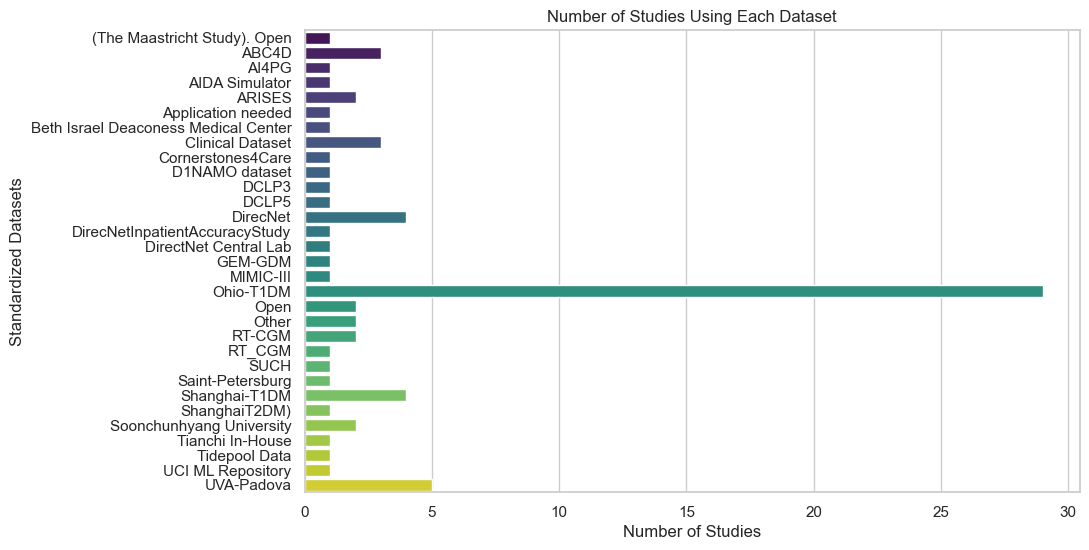

In [6]:
# plot this
plt.figure(figsize=(10, 6))
dataset_df = dataset_df[~dataset_df['Standardized Datasets'].str.contains('open-sourced real dataset collected by')]
dataset_df = dataset_df[~dataset_df['Standardized Datasets'].str.contains('in-house dataset')]
dataset_df = dataset_df[~dataset_df['Standardized Datasets'].str.contains('Yes')]
dataset_df = dataset_df[~dataset_df['Standardized Datasets'].str.contains('No')]

sns.barplot(x='Count', y='Standardized Datasets', data=dataset_df, palette='viridis')
plt.title('Number of Studies Using Each Dataset')
plt.xlabel('Number of Studies')
# remove Yes, remove and an open-sourced, remove in-house dataset
plt.show()

# drop the ones with an open-sourced real dataset colelcted by


C:\Users\Biratal\AppData\Local\Temp\ipykernel_13404\2205484350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Hyperparameters Reported?', data=df, palette='viridis')


Text(0.5, 1.0, 'Number of Studies Reporting Hyperparameters')

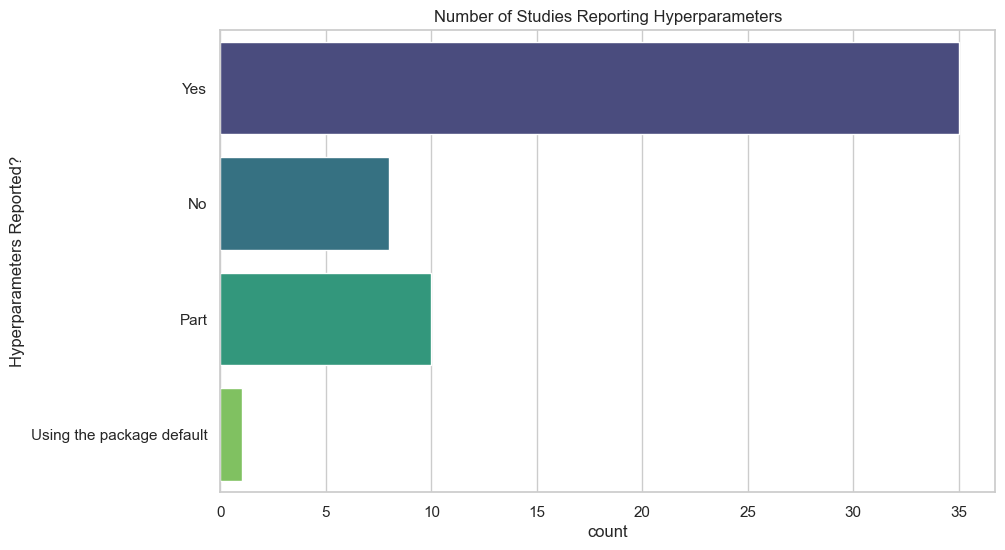

In [7]:
# plot for hyperparameters Reported
df['Hyperparameters Reported?'] = df['Hyperparameters Reported?'].replace('Partly', 'Part')
# plot chart
plt.figure(figsize=(10, 6))
sns.countplot(y='Hyperparameters Reported?', data=df, palette='viridis')
plt.title('Number of Studies Reporting Hyperparameters')

# convert Partly to Part


In [8]:
# do the same for sampling horizon
extract_sampling_horizon = lambda x: [h.strip() for h in re.split(r'[,.]', x)] if isinstance(x, str) else x
df['Sampling Horizon Clean'] = df['Sampling horizon'].apply(extract_sampling_horizon)

<Axes: xlabel='Count', ylabel='Standardized Sampling Horizon'>

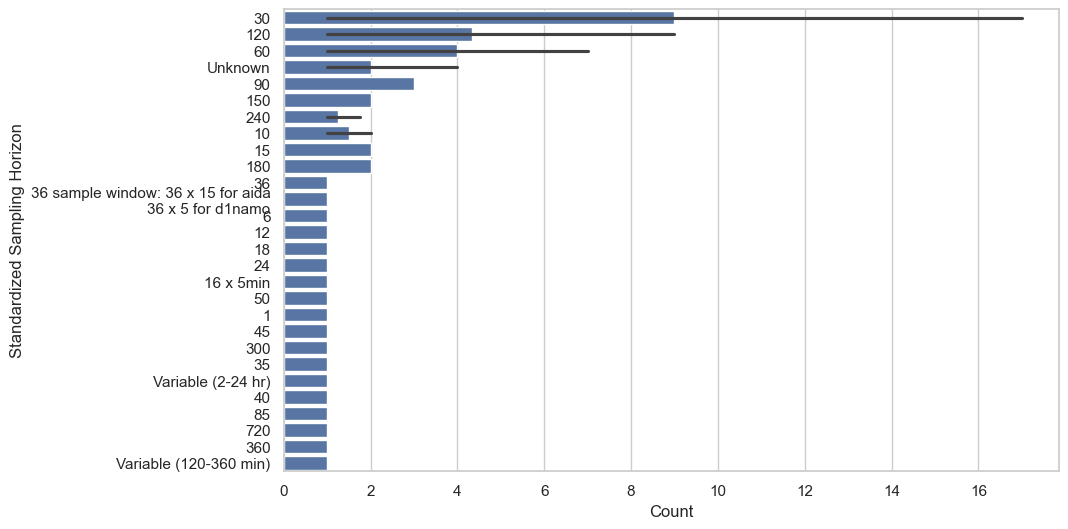

In [9]:
# plot a bar chart after expoding
sampling_horizons = df['Sampling Horizon Clean'].explode().value_counts()
sampling_horizons_df = sampling_horizons.reset_index()
sampling_horizons_df.columns = ['Sampling Horizon', 'Count']
# use the following maping
sampling_horizon_mapping = {
    "30 min": 30,
    "30": 30,
    "120 min": 120,
    "120": 120,
    "60 min": 60,
    "60": 60,
    "90": 90,
    "2 hr": 120,
    "150": 150,
    "180": 180,
    "240 min": 240,
    "240": 240,
    "10": 10,
    "15": 15,
    "36": 36,
    "6": 6,
    "12": 12,
    "18": 18,
    "24": 24,
    "50 min": 50,
    "50": 50,
    "10 x5": 10,
    "1x5": 1,
    "6 x 5": 6,
    "meal: 4h": 240,
    "insulin: 5h": 300,
    "cgm: 35min": 35,
    "45": 45,
    "2-24 hr": "Variable (2-24 hr)",
    "48 x 5 mins": 240,
    "40": 40,
    "85": 85,
    "aida: 12 hr\nuva/padova": 720,
    "ohiot1dm: 6 hr": 360,
    "6 hr": 360,
    "2 hr cgm\n6 hr carbohydrate": "Variable (120-360 min)",
    "36 sample window: 36 x 15 for aida\n36 x 5 for...": "Variable (36 x 15 or 36 x 5)",
    "not clear": "Unknown",
    "not constant": "Unknown",
    "no": "Unknown"
}

sampling_horizons_df['Standardized Sampling Horizon'] = sampling_horizons_df['Sampling Horizon'].replace(sampling_horizon_mapping)

# drop sampling
sampling_horizon_mapping
# now plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Standardized Sampling Horizon', data=sampling_horizons_df)

In [10]:
sampling_horizons_df

,Sampling Horizon,Count,Standardized Sampling Horizon
0,30,17,30
1,120,9,120
2,60,7,60
3,not clear,4,Unknown
4,90,3,90
5,2 hr,3,120
6,150,2,150
7,240,2,240
8,10,2,10
9,15,2,15
